# Creating a personalized learning path involves tailoring educational content, exercises, and resources based on a student's learning style, pace, strengths, and weaknesses. Machine learning can help by recommending topics, adjusting difficulty levels, and suggesting resources that match the student’s needs.

Problem Statement:
We'll simulate a scenario where we have students' performance data, and we aim to recommend personalized learning paths (e.g., topics to focus on) based on their scores in different subjects.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Simulated dataset: Student scores in different subjects
data = {
    'Student_ID': range(1, 16),
    'Math_Score': [78, 65, 89, 56, 72, 91, 82, 60, 68, 95, 62, 70, 85, 88, 75],
    'Science_Score': [82, 61, 85, 52, 76, 88, 79, 59, 66, 92, 64, 72, 80, 86, 77],
    'English_Score': [75, 69, 84, 58, 73, 90, 81, 65, 71, 89, 63, 68, 78, 85, 74],
    'History_Score': [70, 66, 88, 55, 74, 87, 80, 62, 69, 90, 65, 73, 82, 83, 76],
    'Art_Score': [85, 62, 92, 60, 79, 95, 88, 67, 72, 96, 66, 77, 87, 89, 80]
}


In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)
print("Original Data:\n", df)

Original Data:
     Student_ID  Math_Score  Science_Score  English_Score  History_Score  \
0            1          78             82             75             70   
1            2          65             61             69             66   
2            3          89             85             84             88   
3            4          56             52             58             55   
4            5          72             76             73             74   
5            6          91             88             90             87   
6            7          82             79             81             80   
7            8          60             59             65             62   
8            9          68             66             71             69   
9           10          95             92             89             90   
10          11          62             64             63             65   
11          12          70             72             68             73   
12       

In [4]:
# Feature selection: We focus on the scores for clustering
X = df[['Math_Score', 'Science_Score', 'English_Score', 'History_Score', 'Art_Score']]


In [5]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


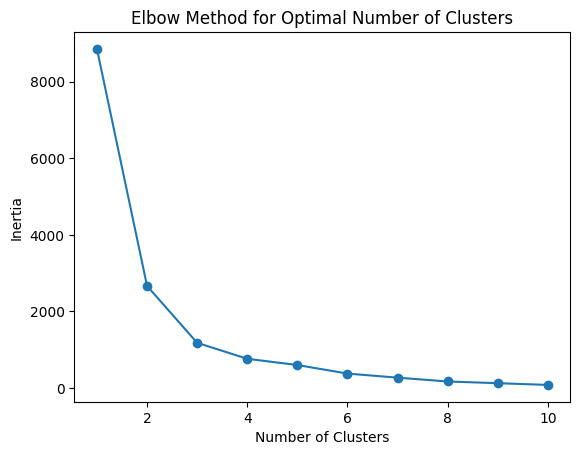

In [6]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
# From the elbow method, let's assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


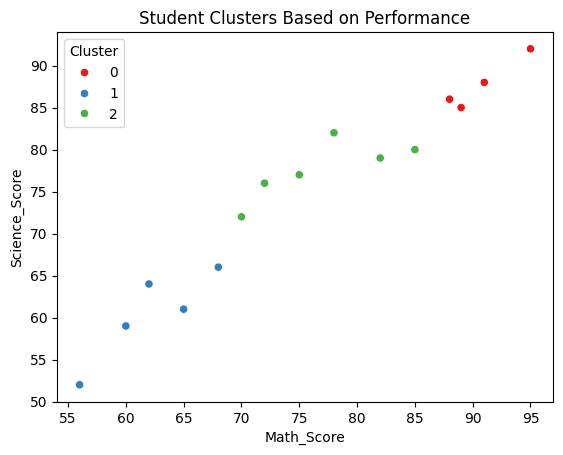

In [8]:
# Visualize the clustering result
sns.scatterplot(x='Math_Score', y='Science_Score', hue='Cluster', data=df, palette='Set1')
plt.title('Student Clusters Based on Performance')
plt.show()

In [9]:
# Display the clusters
print("Student Clusters:\n", df)


Student Clusters:
     Student_ID  Math_Score  Science_Score  English_Score  History_Score  \
0            1          78             82             75             70   
1            2          65             61             69             66   
2            3          89             85             84             88   
3            4          56             52             58             55   
4            5          72             76             73             74   
5            6          91             88             90             87   
6            7          82             79             81             80   
7            8          60             59             65             62   
8            9          68             66             71             69   
9           10          95             92             89             90   
10          11          62             64             63             65   
11          12          70             72             68             73   
12    

In [12]:
# Recommendations based on clusters
def recommend_learning_path(cluster):
    if cluster == 1:
        return "Focus on improving math and science skills with extra practice and foundational content."
    elif cluster == 2:
        return "Balanced performance, recommend exploring advanced topics in all subjects."
    elif cluster == 0:
        return "High achievers, recommend taking up challenging projects and enrichment courses."


In [13]:
# Apply recommendations
df['Recommendation'] = df['Cluster'].apply(recommend_learning_path)
print("\nPersonalized Learning Path Recommendations:\n", df[['Student_ID', 'Cluster', 'Recommendation']])



Personalized Learning Path Recommendations:
     Student_ID  Cluster                                     Recommendation
0            1        2  Balanced performance, recommend exploring adva...
1            2        1  Focus on improving math and science skills wit...
2            3        0  High achievers, recommend taking up challengin...
3            4        1  Focus on improving math and science skills wit...
4            5        2  Balanced performance, recommend exploring adva...
5            6        0  High achievers, recommend taking up challengin...
6            7        2  Balanced performance, recommend exploring adva...
7            8        1  Focus on improving math and science skills wit...
8            9        1  Focus on improving math and science skills wit...
9           10        0  High achievers, recommend taking up challengin...
10          11        1  Focus on improving math and science skills wit...
11          12        2  Balanced performance, recomme